In [1]:
%pip install seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
pf=pd.read_csv("Churn_Modelling.csv")
pf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:

pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


In [24]:
pf.shape

(10000, 14)


1.Univariate Analysis

In [11]:

#Histogram 
sns.histplot(pf["Age"],color='orange')

<AxesSubplot:xlabel='Age', ylabel='Count'>

In [9]:
import matplotlib.pyplot as plt

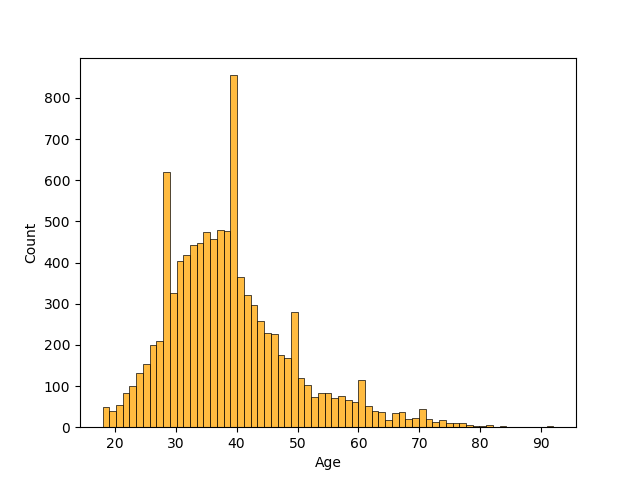

In [12]:
plt.show()

In [14]:
#Histogram on Categorical variables
sns.histplot(x='Age',data=pf, hue=pf['Tenure'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

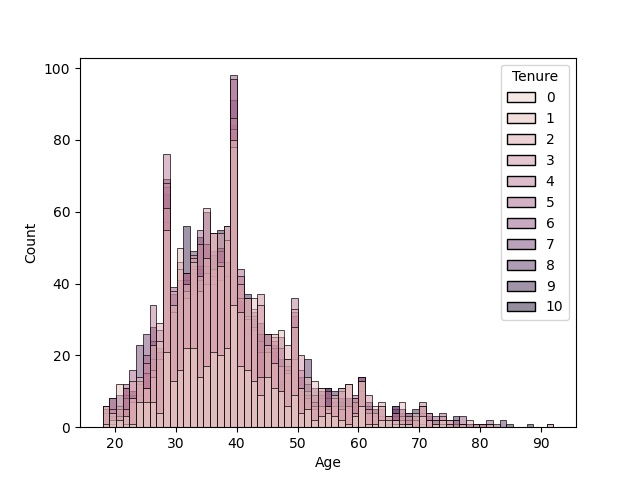

In [15]:
plt.show()

In [19]:
#Distplot
sns.displot(pf["Age"],color='green')

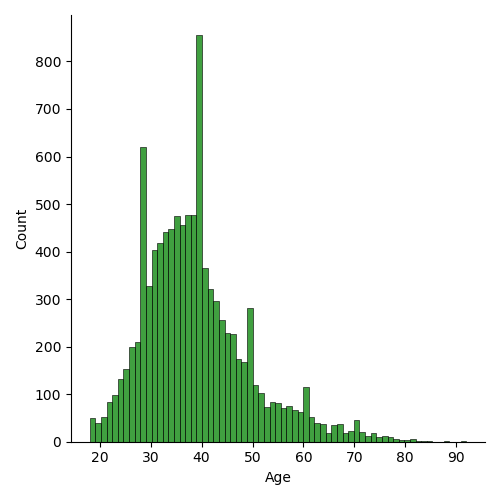

In [20]:
plt.show()

In [22]:
#Boxplot
sns.boxplot(pf["Age"],color='red')

<AxesSubplot:>

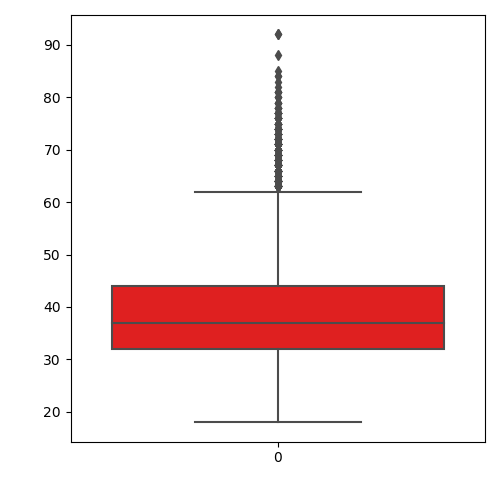

In [23]:
plt.show()

2.Bivariate Analysis

In [27]:
#Barplot
sns.barplot(pf["Age"])

<AxesSubplot:>

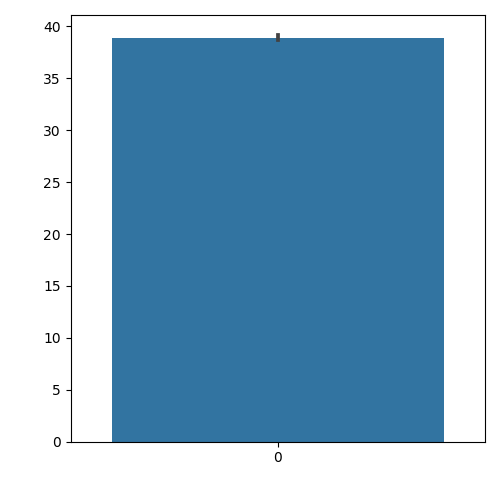

In [28]:
plt.show()

In [30]:
#Linearplot
sns.lineplot(pf["Age"], color='orange')

<AxesSubplot:ylabel='Age'>

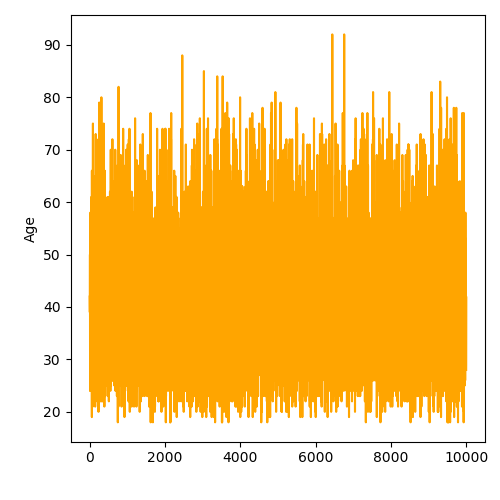

In [31]:
plt.show()

In [32]:
#Scatterplot
sns.scatterplot(x=pf.Age,y=pf.RowNumber,color='green')

<AxesSubplot:xlabel='Age', ylabel='RowNumber'>

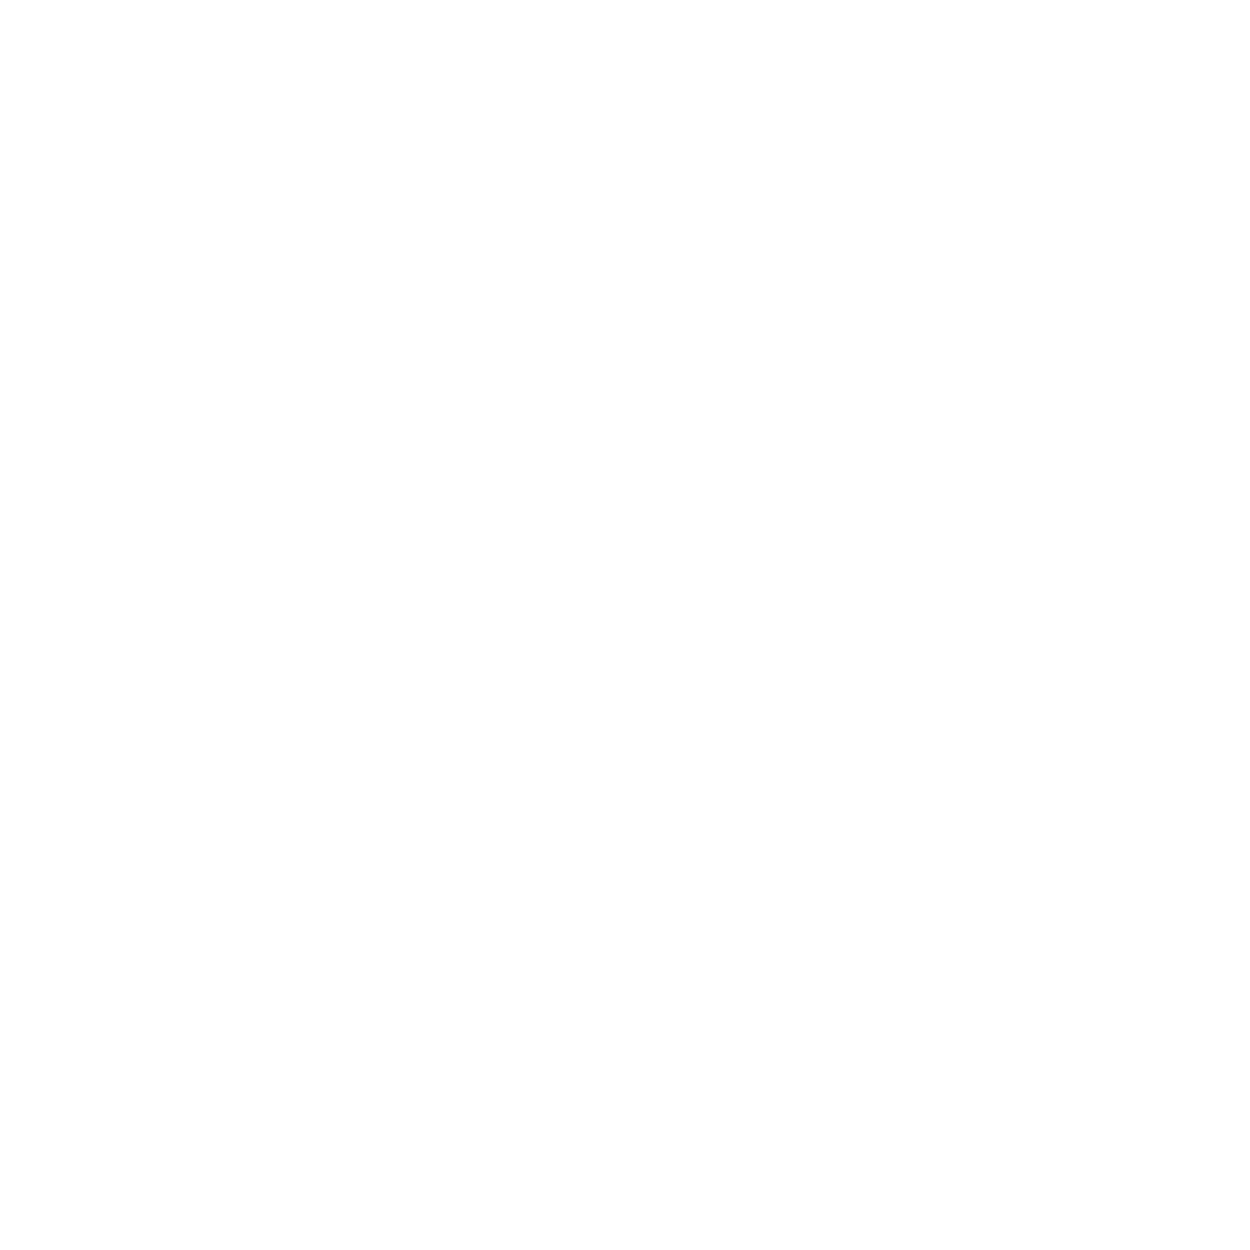

In [41]:
plt.show()

3.Multivariate Analysis

In [42]:
#Pairplot
sns.pairplot(data=pf[["RowNumber","Age","Tenure","Balance","NumOfProducts"]])

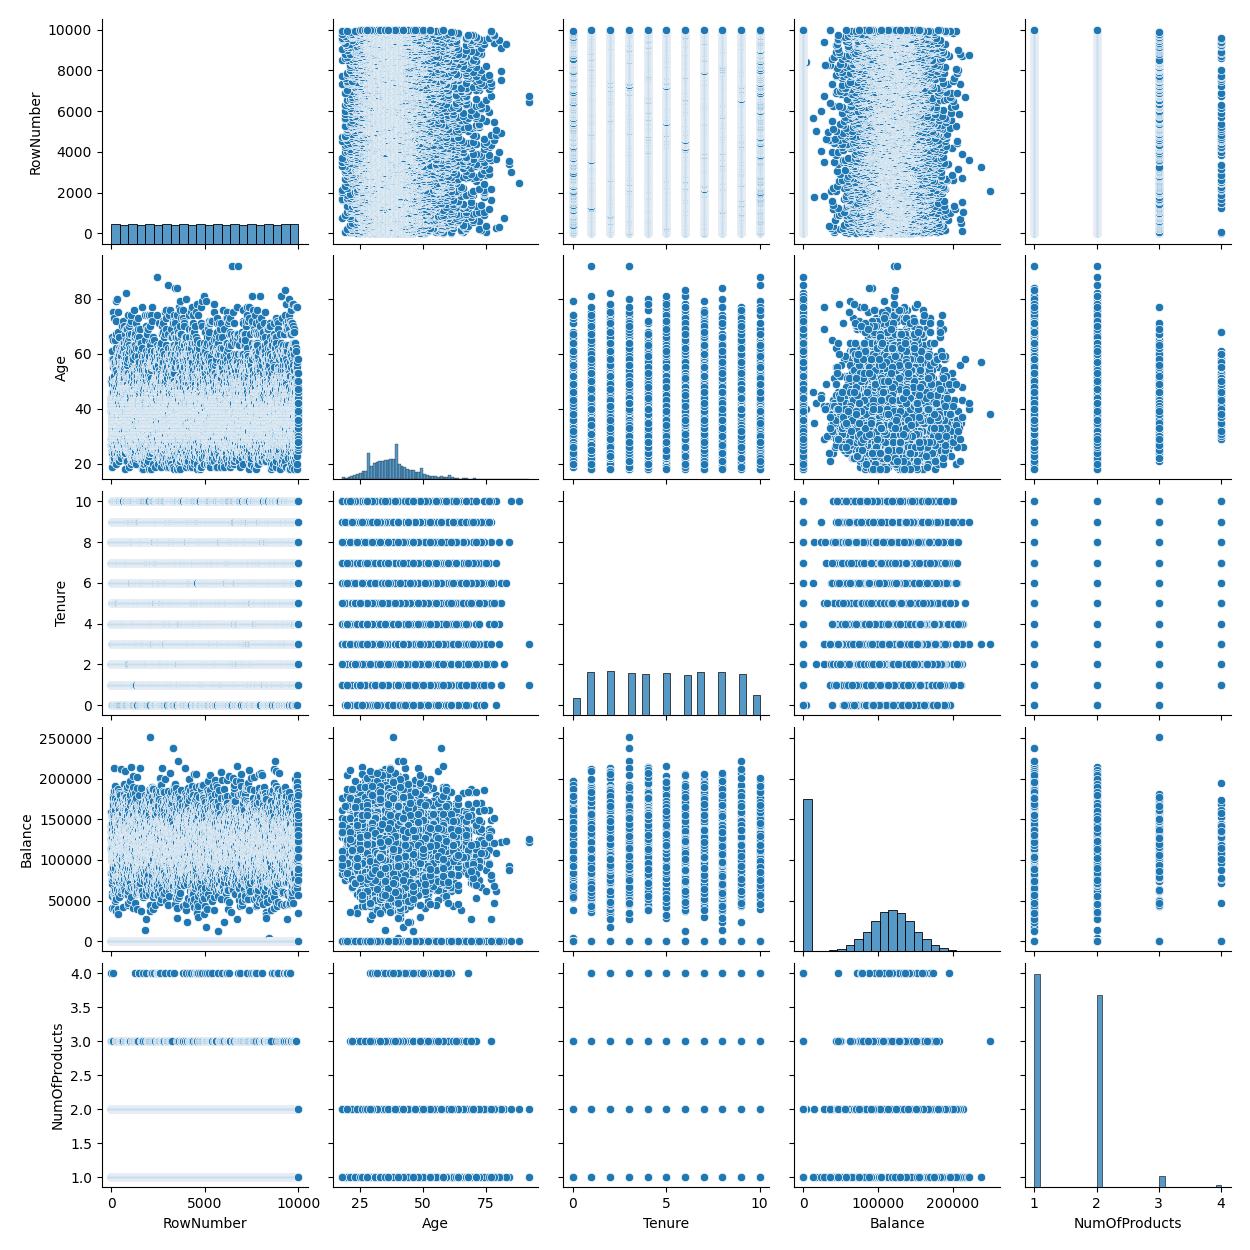

In [39]:
plt.show()

4.Performing Descriptive Statisics

In [43]:
pf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5.Handling Missing Values

In [45]:

pf.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


6. Find the outliers and replace the outliers

In [47]:
outliers=pf.quantile(q=(0.25,0.75))

In [48]:
outliers

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [50]:
a = pf.CreditScore.quantile(0.25)
c = pf.CreditScore.quantile(0.75)
IQR = c - a
lower_limit = a - 1.5 * IQR

In [51]:
pf.median(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [54]:
pf['CreditScore'] = np.where(pf['CreditScore'] < lower_limit, 7, pf['CreditScore'])
sns.boxplot(x=pf.CreditScore)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

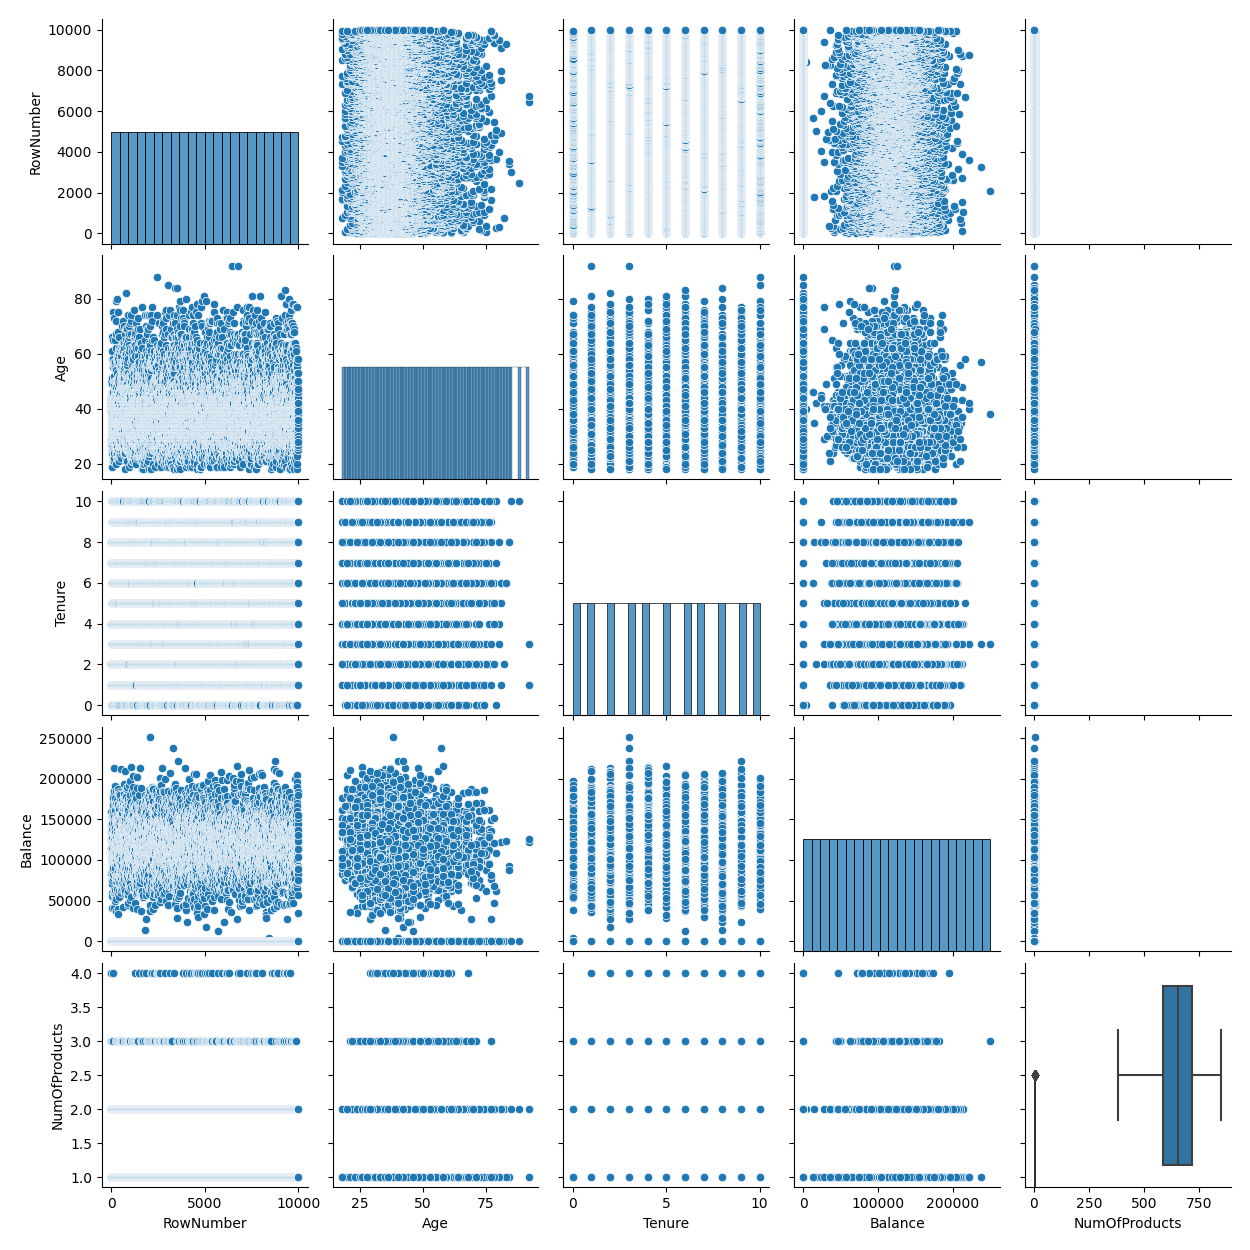

In [55]:
plt.show()

7.Checking for Categorical columns and performing encoding.

In [56]:

pf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pf.Gender = le.fit_transform(pf.Gender)
pf.Geography = le.fit_transform(pf.Geography)

pf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


8.Splitting into Independent(X) and Dependent(Y) Variable

In [58]:
e = pf["Surname"]
e.head()

0    Hargrave
1        Hill
2        Onio
3        Boni
4    Mitchell
Name: Surname, dtype: object

In [59]:
f=pf.drop(columns=["Surname"],axis=1)
f.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


9.Scaling the Independent Variables

In [62]:
from sklearn.preprocessing import scale

X_Scaled = pd.DataFrame(scale(f), columns=f.columns)
X_Scaled.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.312543,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.423455,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.492245,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.494090,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.016611,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


10.Training and Testing Split

In [64]:

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, e, test_size=0.2, random_state=0)

In [65]:

X_Train.shape

(8000, 13)

In [66]:
X_Test.shape

(2000, 13)

In [67]:
Y_Train.shape

(8000,)

In [68]:
Y_Test.shape

(2000,)

In [69]:
X_Train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,0.827747,-0.195066,0.171437,1.515067,-1.095988,-0.469311,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382,-0.505775
9275,1.481077,0.810821,-2.248463,0.306591,0.912419,0.293517,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592,-0.505775
2995,-0.694379,-1.507642,-1.159508,-0.901886,-1.095988,-0.946079,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464,-0.505775
5316,0.109639,1.243462,0.040359,1.515067,0.912419,0.102810,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558,-0.505775
356,-1.608556,-1.100775,2.016611,1.515067,-1.095988,1.723821,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069,-0.505775


In [70]:
X_Test.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,1.522299,-1.045250,-0.534367,0.306591,-1.095988,-0.373958,1.032908,0.875323,-0.911583,0.646092,0.970243,1.613046,-0.505775
898,-1.420801,-0.503813,-1.280503,-0.901886,-1.095988,0.102810,-1.041760,0.424422,-0.911583,0.646092,-1.030670,0.497532,1.977165
2398,-0.901186,-0.793292,0.564671,1.515067,-1.095988,0.293517,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.423561,-0.505775
5906,0.314021,0.760190,1.391470,-0.901886,0.912419,-0.660018,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.186439,-0.505775
2343,-0.920239,1.042107,0.564671,0.306591,0.912419,-0.087897,-0.004426,1.387129,0.807737,0.646092,0.970243,0.618560,-0.505775


In [71]:
Y_Train.head()

7389     Mishin
9275    Carslaw
2995      Moore
5316      Ferri
356     Simmons
Name: Surname, dtype: object

In [72]:
Y_Test.head()

9394    Upchurch
898      Fallaci
2398    Morrison
5906     Worsnop
2343      Gibson
Name: Surname, dtype: object